In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
import os

# Path to the TrainIJCNN2013 folder
train_folder_path = '/content/drive/MyDrive/DLP_A3/TrainIJCNN2013/TrainIJCNN2013'

# List all files and folders, but filter out only the folders
subfolders = [f for f in os.listdir(train_folder_path) if os.path.isdir(os.path.join(train_folder_path, f))]

# Print the list of subfolders
#print(subfolders)
print(len(subfolders))



43


In [60]:
categories = {
    '00': 'speed limit 20 (prohibitory)', '01': 'speed limit 30 (prohibitory)', '02': 'speed limit 50 (prohibitory)',
    '03': 'speed limit 60 (prohibitory)', '04': 'speed limit 70 (prohibitory)', '05': 'speed limit 80 (prohibitory)',
    '06': 'restriction ends 80 (other)', '07': 'speed limit 100 (prohibitory)', '08': 'speed limit 120 (prohibitory)',
    '09': 'no overtaking (prohibitory)', '10': 'no overtaking (trucks) (prohibitory)', '11': 'priority at next intersection (danger)',
    '12': 'priority road (other)', '13': 'give way (other)', '14': 'stop (other)', '15': 'no traffic both ways (prohibitory)',
    '16': 'no trucks (prohibitory)', '17': 'no entry (other)', '18': 'danger (danger)', '19': 'bend left (danger)',
    '20': 'bend right (danger)', '21': 'bend (danger)', '22': 'uneven road (danger)', '23': 'slippery road (danger)',
    '24': 'road narrows (danger)', '25': 'construction (danger)', '26': 'traffic signal (danger)', '27': 'pedestrian crossing (danger)',
    '28': 'school crossing (danger)', '29': 'cycles crossing (danger)', '30': 'snow (danger)', '31': 'animals (danger)',
    '32': 'restriction ends (other)', '33': 'go right (mandatory)', '34': 'go left (mandatory)', '35': 'go straight (mandatory)',
    '36': 'go right or straight (mandatory)', '37': 'go left or straight (mandatory)', '38': 'keep right (mandatory)',
    '39': 'keep left (mandatory)', '40': 'roundabout (mandatory)', '41': 'restriction ends (overtaking) (other)',
    '42': 'restriction ends (overtaking (trucks)) (other)'
}

In [61]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split

# Preprocessing function
def preprocess_image(img, target_size=(32, 32)):
    img = cv2.resize(img, target_size)  # Resize the image
    img = img / 255.0  # Normalize the image
    return img

# Load the images and labels
def load_data(base_path, categories):
    images = []
    labels = []

    for category_index, category_name in categories.items():
        category_folder = os.path.join(base_path, category_index)  # Use string folder names like '00', '01'
        image_files = [f for f in os.listdir(category_folder) if f.endswith('.ppm')]

        for image_file in image_files:
            img_path = os.path.join(category_folder, image_file)  # Full path to image
            img = cv2.imread(img_path)  # Read image
            img = preprocess_image(img)  # Preprocess image
            images.append(img)
            labels.append(int(category_index))  # Convert string index to int for label

    images = np.array(images)
    labels = np.array(labels)

    return images, labels

# Load the data
X, y = load_data(train_folder_path, categories)

# Split data into train and validation sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Create the CNN model
def create_cnn_model(input_shape=(32, 32, 3), num_classes=43):
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))

    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))

    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model
# Create and train the model
model = create_cnn_model(input_shape=(32, 32, 3), num_classes=43)
history = model.fit(X_train, y_train, epochs=30, batch_size=32)

train_accuracy = history.history['accuracy'][-1]  # Get the last epoch's accuracy
print(f'Training Accuracy: {train_accuracy:.4f}')

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.0441 - loss: 3.6846
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.0957 - loss: 3.4554
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.1501 - loss: 3.2758
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.2759 - loss: 2.9350
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.3372 - loss: 2.6425
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.3823 - loss: 2.3405
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.4083 - loss: 2.0976
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.4732 - loss: 1.8740
Epoch 9/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.4970 - loss: 1.6932
Epoch 10/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.5281 - loss: 1.5882
Epoch 11/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5800 - loss: 1.4119
Epoch 12/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.6146 - l

In [63]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')
model.save('traffic_sign_classifier.h5')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8739 - loss: 0.6458


Test Accuracy: 0.8538


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


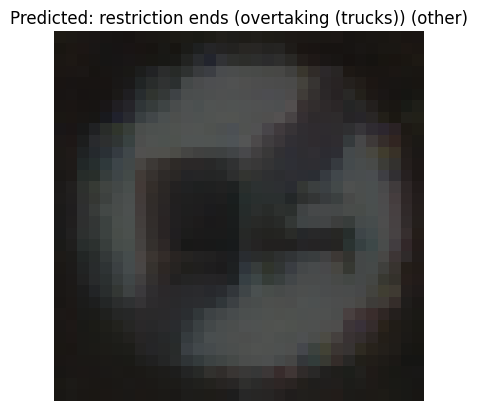

Predicted label: restriction ends (overtaking (trucks)) (other)


In [66]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# Path to the image you want to classify
img_path = '/content/00003.ppm'

# Load the image with target size as per your model input shape (e.g., 32x32)
img = image.load_img(img_path, target_size=(32, 32))  # Adjust target_size as needed

# Convert image to a numpy array
img_array = image.img_to_array(img)

# Normalize the image data (if your model was trained with normalized data)
img_array = img_array / 255.0  # If you normalized images to [0, 1] range during training

# Add an extra dimension to the image to match the input shape (batch_size, height, width, channels)
img_array = np.expand_dims(img_array, axis=0)

# Predict the class for the image
predicted_class = model.predict(img_array)

# Get the index of the maximum value (the predicted class)
predicted_class_index = np.argmax(predicted_class)

# Define the class names (traffic sign labels)
class_names = [
    "speed limit 20 (prohibitory)", "speed limit 30 (prohibitory)", "speed limit 50 (prohibitory)",
    "speed limit 60 (prohibitory)", "speed limit 70 (prohibitory)", "speed limit 80 (prohibitory)",
    "restriction ends 80 (other)", "speed limit 100 (prohibitory)", "speed limit 120 (prohibitory)",
    "no overtaking (prohibitory)", "no overtaking (trucks) (prohibitory)", "priority at next intersection (danger)",
    "priority road (other)", "give way (other)", "stop (other)", "no traffic both ways (prohibitory)",
    "no trucks (prohibitory)", "no entry (other)", "danger (danger)", "bend left (danger)", "bend right (danger)",
    "bend (danger)", "uneven road (danger)", "slippery road (danger)", "road narrows (danger)",
    "construction (danger)", "traffic signal (danger)", "pedestrian crossing (danger)", "school crossing (danger)",
    "cycles crossing (danger)", "snow (danger)", "animals (danger)", "restriction ends (other)",
    "go right (mandatory)", "go left (mandatory)", "go straight (mandatory)", "go right or straight (mandatory)",
    "go left or straight (mandatory)", "keep right (mandatory)", "keep left (mandatory)", "roundabout (mandatory)",
    "restriction ends (overtaking) (other)", "restriction ends (overtaking (trucks)) (other)"
]

# Get the predicted label
predicted_label = class_names[predicted_class_index]

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.title(f'Predicted: {predicted_label}')
plt.show()

print(f'Predicted label: {predicted_label}')


In [47]:
!pip install streamlit pyngrok

Writing app.py


In [52]:
!ngrok config add-authtoken 2nNJOyHu7o5yYPe1YbtAqOLdwn0_3NESFS1Q5Y3gVgoefUQEs

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


Overwriting app.py


In [67]:
from pyngrok import ngrok
import os

# Set up the streamlit tunnel on port 8501 (default port)
public_url = ngrok.connect(8501)

# Run the Streamlit app in the background
os.system("streamlit run app.py &")

print(f"Streamlit app is live at {public_url}")

Streamlit app is live at NgrokTunnel: "https://66f3-35-237-132-176.ngrok-free.app" -> "http://localhost:8501"


In [68]:
%%writefile app.py
import streamlit as st
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from PIL import Image as PILImage

# Load the trained model (Assuming the model is already saved)
try:
    model = load_model('/content/traffic_sign_classifier.h5')
    st.write("Model loaded successfully.")
except Exception as e:
    st.error(f"Error loading model: {str(e)}")
    model = None

# Define class names for the traffic signs
class_names = [
    "speed limit 20 (prohibitory)", "speed limit 30 (prohibitory)", "speed limit 50 (prohibitory)",
    "speed limit 60 (prohibitory)", "speed limit 70 (prohibitory)", "speed limit 80 (prohibitory)",
    "restriction ends 80 (other)", "speed limit 100 (prohibitory)", "speed limit 120 (prohibitory)",
    "no overtaking (prohibitory)", "no overtaking (trucks) (prohibitory)", "priority at next intersection (danger)",
    "priority road (other)", "give way (other)", "stop (other)", "no traffic both ways (prohibitory)",
    "no trucks (prohibitory)", "no entry (other)", "danger (danger)", "bend left (danger)", "bend right (danger)",
    "bend (danger)", "uneven road (danger)", "slippery road (danger)", "road narrows (danger)",
    "construction (danger)", "traffic signal (danger)", "pedestrian crossing (danger)", "school crossing (danger)",
    "cycles crossing (danger)", "snow (danger)", "animals (danger)", "restriction ends (other)",
    "go right (mandatory)", "go left (mandatory)", "go straight (mandatory)", "go right or straight (mandatory)",
    "go left or straight (mandatory)", "keep right (mandatory)", "keep left (mandatory)", "roundabout (mandatory)",
    "restriction ends (overtaking) (other)", "restriction ends (overtaking (trucks)) (other)"
]

# Function to process the uploaded image
def process_image(image_file):
    img = image.load_img(image_file, target_size=(32, 32))  # Adjust the target size based on your model input
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalization if you did that during training
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array, img

# Streamlit UI
st.title("German Traffic Sign Classifier")

st.write("Upload an image of a traffic sign, and the model will predict the class.")

# File uploader
uploaded_file = st.file_uploader("Choose an image...", type=["ppm", "png", "jpg", "jpeg"])

if uploaded_file is not None:
    # Process the uploaded image
    img_array, img = process_image(uploaded_file)

    # Display the uploaded image
    st.image(img, caption='Uploaded Image', use_column_width=True)

    # Make prediction if model is loaded
    if model:
        predicted_class = model.predict(img_array)
        predicted_class_index = np.argmax(predicted_class)
        predicted_label = class_names[predicted_class_index]

        # Display prediction result
        st.write(f"Predicted class: {predicted_label}")
    else:
        st.error("Model not loaded. Please check the model file.")


Overwriting app.py
